In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [171]:
#laoding dataset
data=pd.read_csv('/content/talking_data.csv')
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [172]:
print('dimension of dataset', data.shape)
print('number of raw',data.shape[0])
print('number of columns',data.shape[1])

dimension of dataset (100000, 8)
number of raw 100000
number of columns 8


In [173]:
print('names of features in the dataset',data.columns)

names of features in the dataset Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')


In [174]:
#getting basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [175]:
#pull out the statistical features of the data
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [176]:
#lets drop the column attributed_time because of its(10000-227) null  alue counts
data.drop('attributed_time',axis=1,inplace=True)

In [177]:
#what the new dataset looks like after dropping attributes time column
data.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [178]:
#exploring for missing values in the dataset
data.isnull().sum()

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


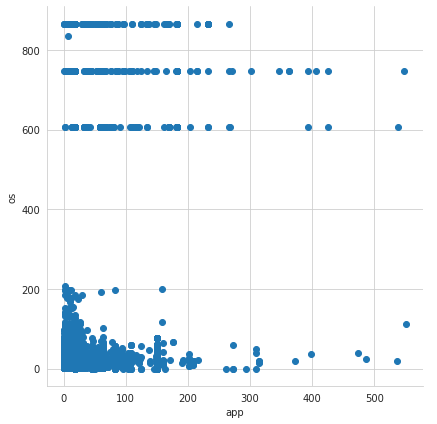

In [179]:
#now that we are left with more usefull data lets visualize it with the help of graphs
#lets start with a scattered plotting 
sns.set_style('whitegrid')
sns.FacetGrid(data,size=6)\
.map(plt.scatter,'app','os',)\
.add_legend();
plt.show();


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


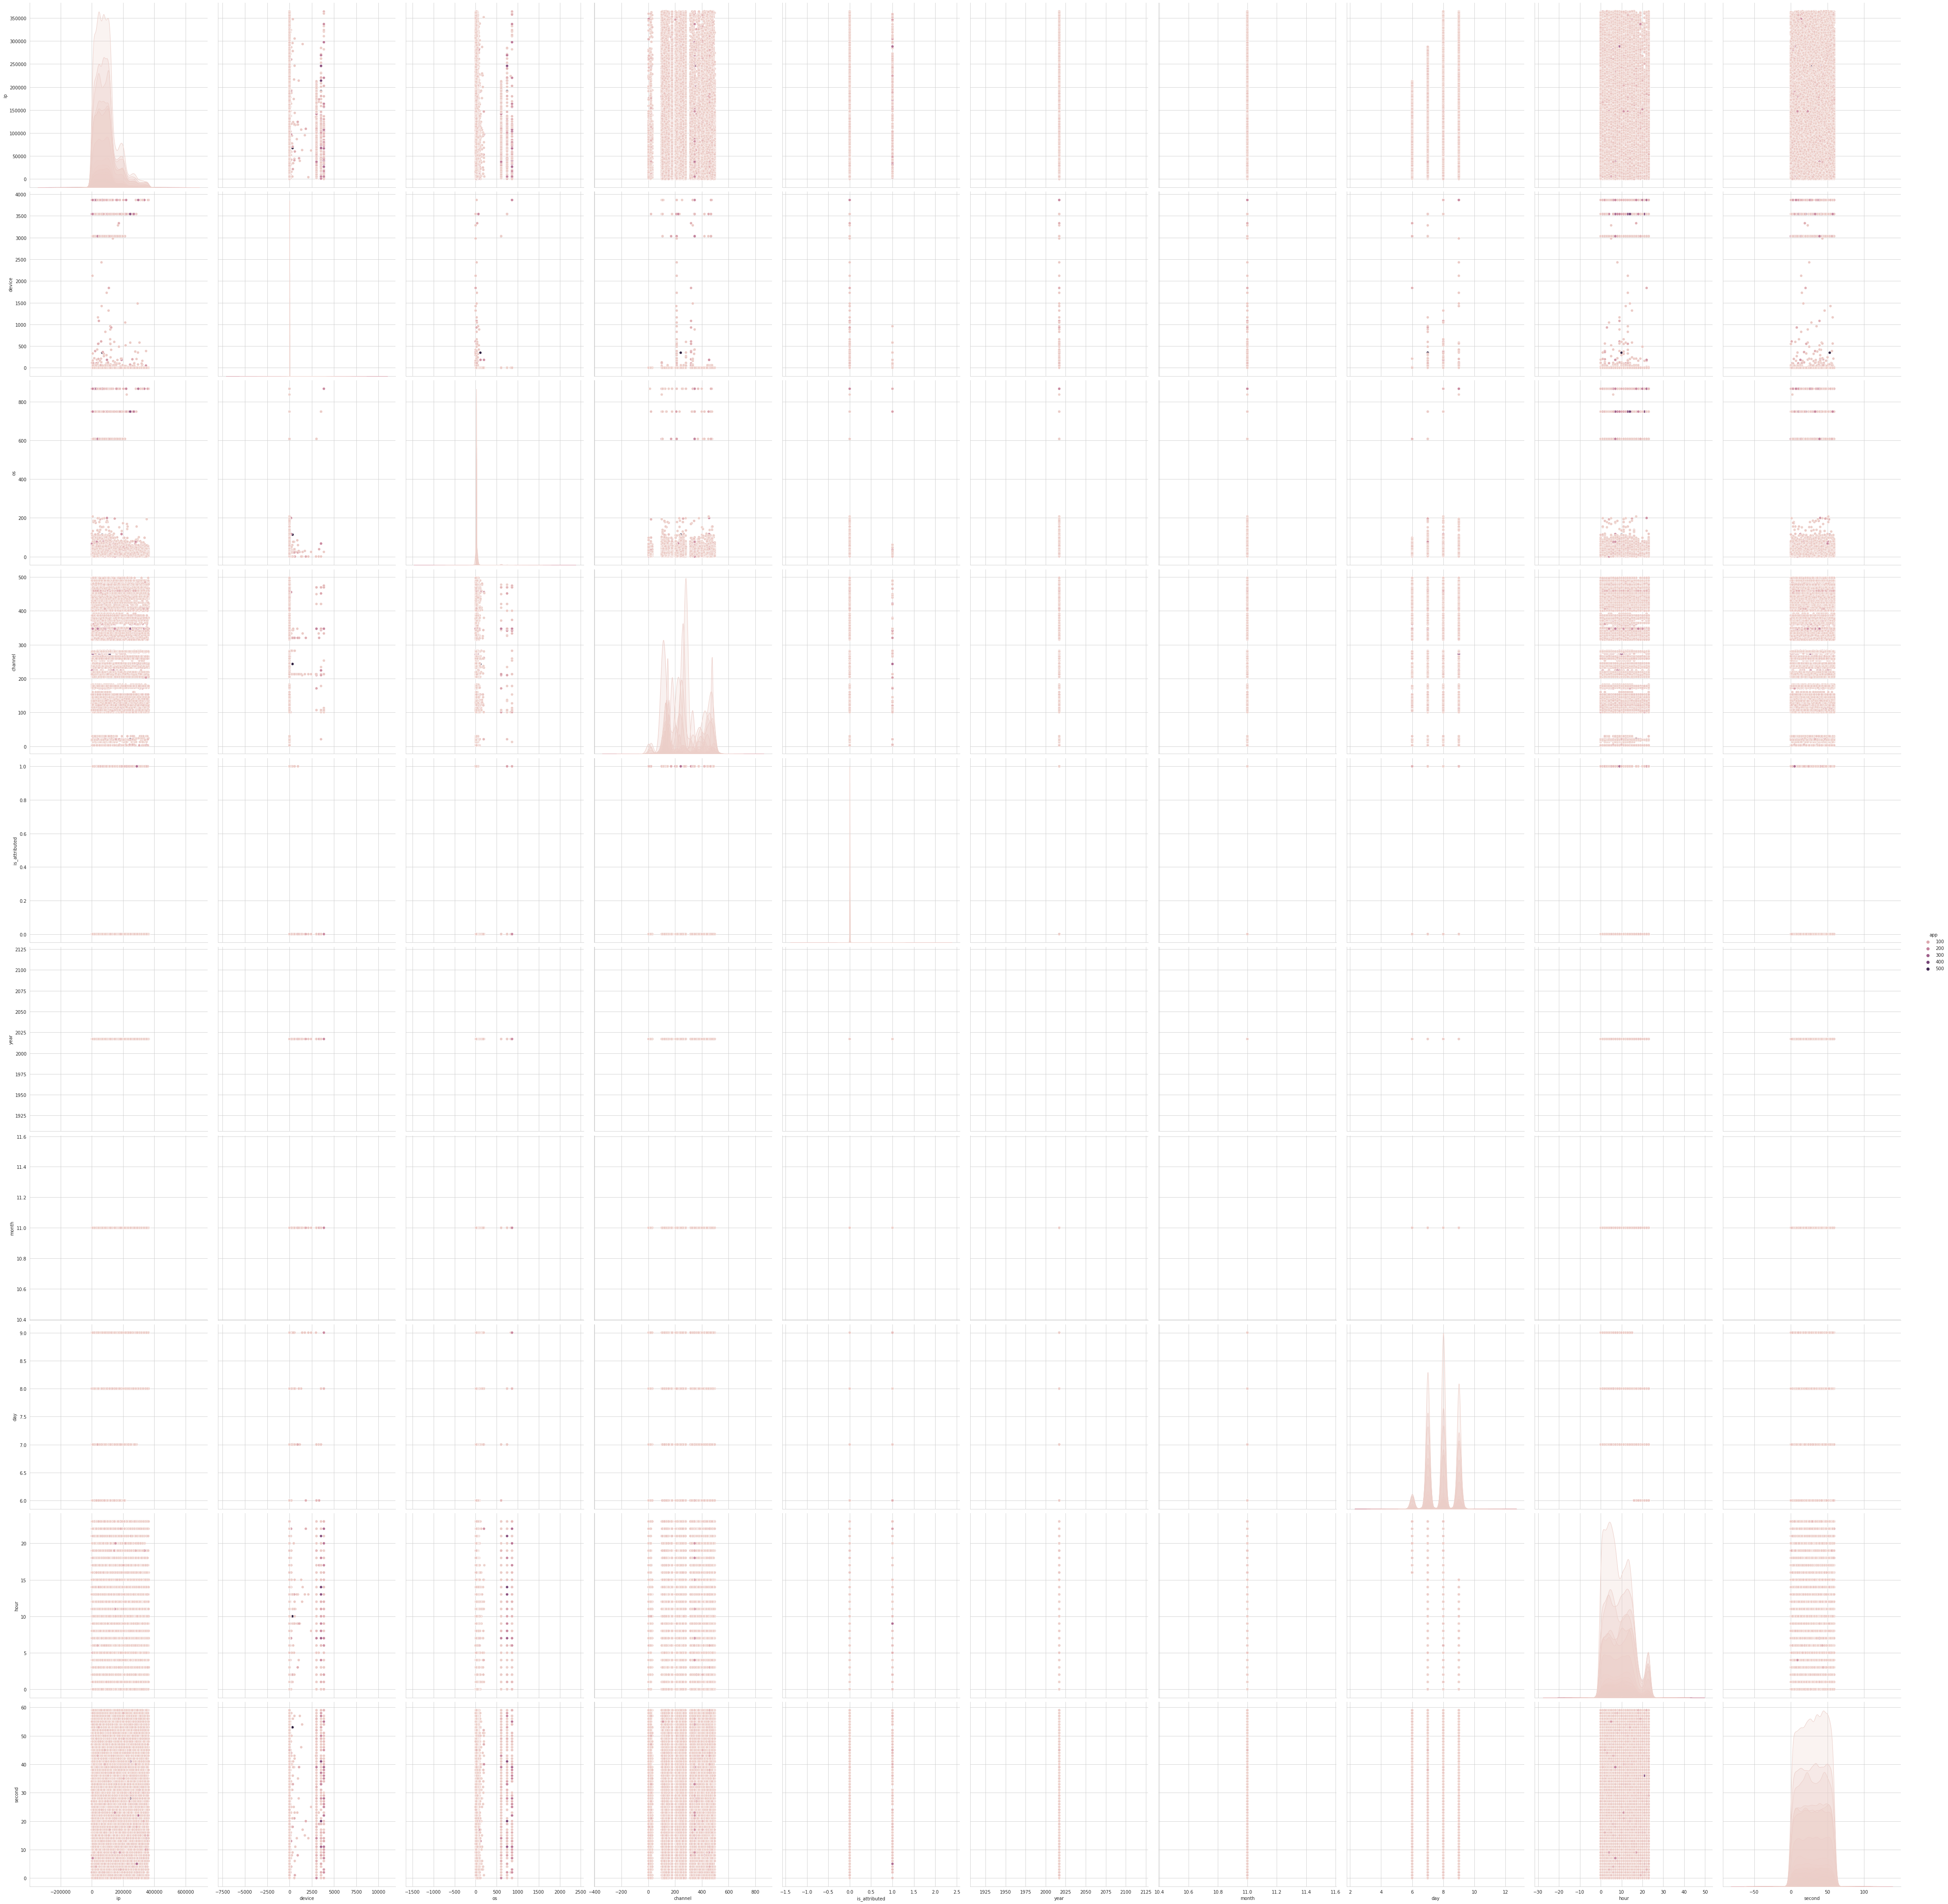

In [223]:
#lets proceed with a pairplot
sns.set_style('whiteGrid')
sns.pairplot(data,hue='app',size=6)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10794fb0d0>,
      dtype=object)

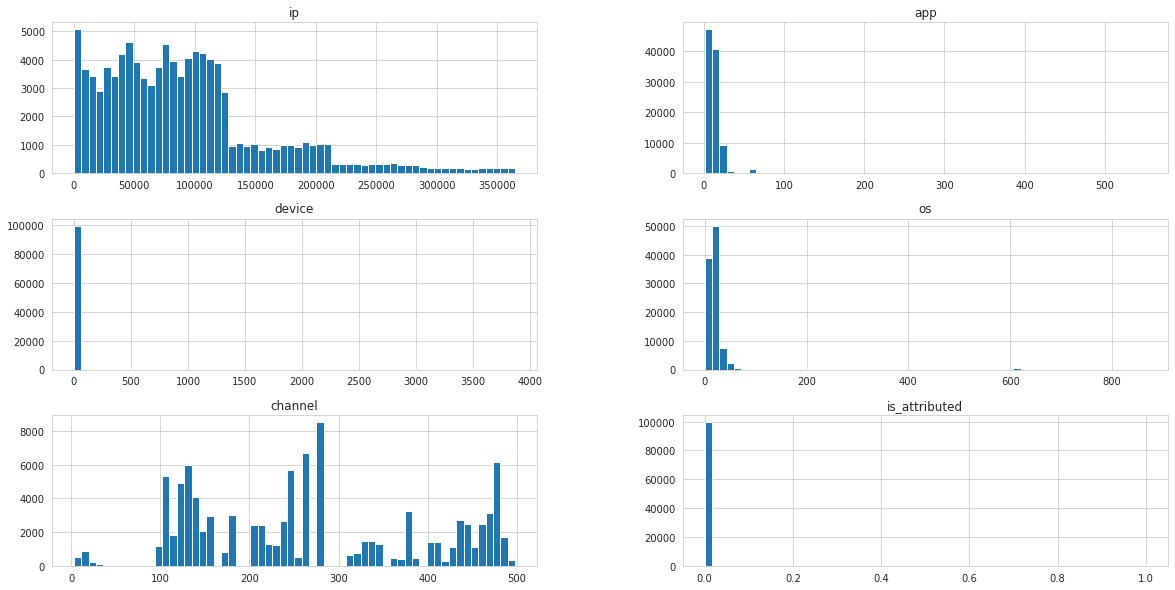

In [181]:
#lets see what the histogram looks like
data.hist(bins=60,figsize=(20,10))

In [182]:
#now that we have a visual representation of the data lets take a look at the columns with the most unique values
print('number ofunique values for ip', len(data['ip'].unique()))
print('number of unique values for app',len(data['app'].unique()))
print('number of unique values for device',len(data['device'].unique()))
print('number of unique values for os',len(data['os'].unique()))
print('number of unique values for channel',len(data['channel'].unique()))
print('number of unique values for click_time',len(data['click_time'].unique()))
print('number of unique values for is_attributed',len(data['is_attributed'].unique()))

number ofunique values for ip 34857
number of unique values for app 161
number of unique values for device 100
number of unique values for os 130
number of unique values for channel 161
number of unique values for click_time 80350
number of unique values for is_attributed 2


from the above observation click_time is the feture with the highest number of unique values

In [183]:
#lets rework the column click_time to make it more exploitable and easy to process
#lets start by changing its dtype
from datetime import datetime
data['click_time']=pd.to_datetime(data['click_time'])

In [184]:
#lets double check the dtpes of the click time column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ip             100000 non-null  int64         
 1   app            100000 non-null  int64         
 2   device         100000 non-null  int64         
 3   os             100000 non-null  int64         
 4   channel        100000 non-null  int64         
 5   click_time     100000 non-null  datetime64[ns]
 6   is_attributed  100000 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.3 MB


click time column dtype has been changed to datatime

In [185]:
#now lets break down click time columns into years months days hours and seconds
data['year']=pd.DatetimeIndex(data['click_time']).year
data['month']=pd.DatetimeIndex(data['click_time']).month
data['day']=pd.DatetimeIndex(data['click_time']).day
data['hour']=pd.DatetimeIndex(data['click_time']).hour
data['second']=pd.DatetimeIndex(data['click_time']).second

In [186]:
#lets take a look at the structure of the updated dataset
data.head()

,ip,app,device,os,channel,click_time,is_attributed,year,month,day,hour,second
0,87540,12,1,13,497,2017-11-07 09:30:38,0,2017,11,7,9,38
1,105560,25,1,17,259,2017-11-07 13:40:27,0,2017,11,7,13,27
2,101424,12,1,19,212,2017-11-07 18:05:24,0,2017,11,7,18,24
3,94584,13,1,13,477,2017-11-07 04:58:08,0,2017,11,7,4,8
4,68413,12,1,1,178,2017-11-09 09:00:09,0,2017,11,9,9,9


In [187]:
#double check the braod line features of the new data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ip             100000 non-null  int64         
 1   app            100000 non-null  int64         
 2   device         100000 non-null  int64         
 3   os             100000 non-null  int64         
 4   channel        100000 non-null  int64         
 5   click_time     100000 non-null  datetime64[ns]
 6   is_attributed  100000 non-null  int64         
 7   year           100000 non-null  int64         
 8   month          100000 non-null  int64         
 9   day            100000 non-null  int64         
 10  hour           100000 non-null  int64         
 11  second         100000 non-null  int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 9.2 MB


In [188]:
#now that the click_time column is broken down, lets drop the unecessary columns 
data.drop('click_time', axis=1, inplace=True)

In [189]:
#how does the data appears after deletion
data.head()

,ip,app,device,os,channel,is_attributed,year,month,day,hour,second
0,87540,12,1,13,497,0,2017,11,7,9,38
1,105560,25,1,17,259,0,2017,11,7,13,27
2,101424,12,1,19,212,0,2017,11,7,18,24
3,94584,13,1,13,477,0,2017,11,7,4,8
4,68413,12,1,1,178,0,2017,11,9,9,9


In [190]:
#lets establish a correlation table to see how the features relate to each other
corr=data.corr()
corr

,ip,app,device,os,channel,is_attributed,year,month,day,hour,second
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955,NaN,NaN,0.057067,-0.007955,0.001730
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426,NaN,NaN,-0.032182,0.026079,-0.003269
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695,NaN,NaN,-0.040110,0.012035,0.000127
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183,NaN,NaN,-0.031336,0.014660,0.000044
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336,NaN,NaN,0.000265,-0.021326,0.003254
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000,NaN,NaN,-0.000603,-0.002944,0.000182
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,0.057067,-0.032182,-0.040110,-0.031336,0.000265,-0.000603,NaN,NaN,1.000000,-0.274896,0.005629
hour,-0.007955,0.026079,0.012035,0.014660,-0.021326,-0.002944,NaN,NaN,-0.274896,1.000000,-0.001929


In [191]:
#the features year and month lets strange so lets look deeper into it
print(data.year.unique())
print(data.month.unique())


[2017]
[11]


In [192]:
#given that the year and month columns both have only a single unique value type, lets drop those columns to make the corr tab more effectif
data1=data.drop(['year','month'],axis=1)
data1

,ip,app,device,os,channel,is_attributed,day,hour,second
0,87540,12,1,13,497,0,7,9,38
1,105560,25,1,17,259,0,7,13,27
2,101424,12,1,19,212,0,7,18,24
3,94584,13,1,13,477,0,7,4,8
4,68413,12,1,1,178,0,9,9,9
...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,0,9,13,41
99996,85150,9,1,13,244,0,7,11,43
99997,18839,3,1,13,19,0,8,11,42
99998,114276,15,1,12,245,0,8,17,21


In [193]:
#now lets see what the corr for the modified data looks like
corr1=data1.corr()
corr1

,ip,app,device,os,channel,is_attributed,day,hour,second
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955,0.057067,-0.007955,0.001730
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426,-0.032182,0.026079,-0.003269
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695,-0.040110,0.012035,0.000127
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183,-0.031336,0.014660,0.000044
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336,0.000265,-0.021326,0.003254
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000,-0.000603,-0.002944,0.000182
day,0.057067,-0.032182,-0.040110,-0.031336,0.000265,-0.000603,1.000000,-0.274896,0.005629
hour,-0.007955,0.026079,0.012035,0.014660,-0.021326,-0.002944,-0.274896,1.000000,-0.001929
second,0.001730,-0.003269,0.000127,0.000044,0.003254,0.000182,0.005629,-0.001929,1.000000


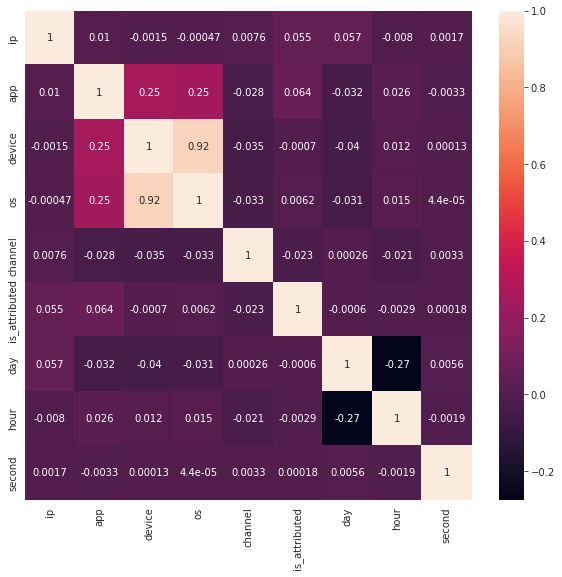

In [194]:
#lets plot a heatmap
plt.figure(figsize=(10,9))
sns.heatmap(corr1,annot=True)
plt.show()

looking at the overoll graph no feature is highly impacting the dependent variable. 

In [195]:
#let define the x and y values for our classification
y=data1.is_attributed
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_attributed, Length: 100000, dtype: int64

In [196]:
y.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [197]:
x=data1.drop(['is_attributed'],axis=1)
x.head(2)

,ip,app,device,os,channel,day,hour,second
0,87540,12,1,13,497,7,9,38
1,105560,25,1,17,259,7,13,27


In [198]:
print(x.shape)
print(y.shape)

(100000, 8)
(100000,)


In [229]:
#lets import major libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

In [240]:
#now that the dependent variable is largely inbalanced,lets try to balance it in orther to get a more accurate classification
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [241]:
y_train.shape

(80000,)

In [242]:
smote=SMOTE(random_state=1)
x_resampled, y_resampled=smote.fit_resample( x_train,y_train)

In [243]:
#now that we have succesfully balanced out dependent variable view to double check
y_resampled.value_counts()

0    79823
1    79823
Name: is_attributed, dtype: int64

In [244]:
Sx=preprocessing.scale(x_resampled)
Sx_resampled_train,Sx_resampled_test,y_resampled_train,y_resampled_test=train_test_split(Sx,y_resampled,test_size=0.2)

from xgboost import  XGBClassifier

In [222]:
from xgboost import XGBClassifier

In [245]:
xgbcl=XGBClassifier(n_estimators=10,learning_rate=0.1)
xgbcl=xgbcl.fit(Sx_resampled_train,y_resampled_train)
y_resampled_pred=xgbcl.predict(Sx_resampled_test)
print(accuracy_score(y_resampled_pred,y_resampled_test))
print(classification_report(y_resampled_pred,y_resampled_test))


0.926714688380833
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     15593
           1       0.94      0.92      0.93     16337

    accuracy                           0.93     31930
   macro avg       0.93      0.93      0.93     31930
weighted avg       0.93      0.93      0.93     31930



In [247]:
from sklearn.ensemble import GradientBoostingClassifier

In [252]:
gbcl=GradientBoostingClassifier(n_estimators=10,learning_rate=0.1)
gbcl=gbcl.fit(Sx_resampled_train,y_resampled_train)
y_resampled_pred=gbcl.predict(Sx_resampled_test)
print(accuracy_score(y_resampled_pred,y_resampled_test))
print(classification_report(y_resampled_pred,y_resampled_test))

0.9312245537112434
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     15673
           1       0.94      0.93      0.93     16257

    accuracy                           0.93     31930
   macro avg       0.93      0.93      0.93     31930
weighted avg       0.93      0.93      0.93     31930



In [254]:
#based off of their accuracy scores, the gredient boost classifier performs better than the xgredient boost classifier